In [1]:
import torch
import torch.nn as nn
import random
import gym
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros import SuperMarioBrosEnv
from tqdm import tqdm
import pickle 
import gym
import numpy as np
import collections 
import cv2
import matplotlib.pyplot as plt
import time
import datetime
import json
from toolkit.gym_env import *
from toolkit.action_utils import *
from toolkit.marlios_model import *
from toolkit.train_marlios import *
from toolkit.constants import *
import warnings

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [21]:
# train(
#     name="Seemingly Good hyper params, needs more time (same as resilient grass but that was cut off with dif rewards plotting)",
#     training_mode=True, 
#     pretrained=False, # use the pretrained model
#     ep_per_stat=100, 
#     gamma=0.9,
#     num_episodes=3000,
#     run_id=None,
#     lr=0.000007,
#     lr_decay= 0.999,
#     exploration_min=0.2,
#     exploration_max = 1, # setting this to the min for the rerun model
#     exploration_decay=0.995, 
#     action_space=SIMPLE_MOVEMENT,
#     n_actions=len(SIMPLE_MOVEMENT),
#     debug=True,
#     device='mps',
#     max_time_per_ep=100 # limit runs to 200 seconds
#     )

train(
    name="Lowering min lr by a factor of ten",
    training_mode=True, 
    pretrained=True, # use the pretrained model
    ep_per_stat=100, 
    gamma=0.9,
    num_episodes=3000,
    run_id='1682283822',
    lr=1e-8,
    lr_decay= 0.999,
    exploration_min=0.02,
    exploration_max = 0.02, # setting this to the min for the rerun model
    exploration_decay=0.995, 
    action_space=SIMPLE_MOVEMENT,
    n_actions=len(SIMPLE_MOVEMENT),
    debug=True,
    device='mps',
    max_time_per_ep=150 # limit runs to 200 seconds
    )


 42%|████▏     | 1256/3000 [2:45:02<5:02:43, 10.42s/it] 

In [3]:
# only need to run if you cut the above off early, even then you don't 'have' to but it will do it automatically for you, it's just not as nice to have the output above as well
wandb.finish()

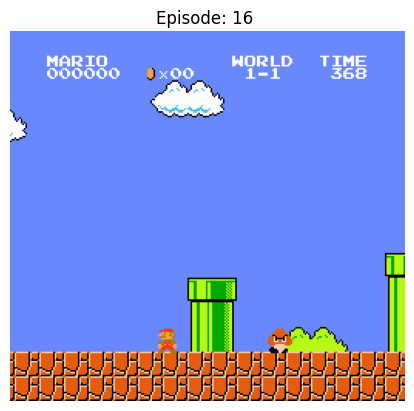

(('A',), ('A',))


In [7]:
# cp ModelCheckpoints/*1682283822* . resetting this run here

run_id='1682283822'
visualize(run_id=run_id, action_space=SIMPLE_MOVEMENT, n_actions=len(SIMPLE_MOVEMENT))
# total_rewards = load_item('total_rewards-1682227242.pkl')
# plot_rewards(ep_per_stat=100, total_rewards=total_rewards)